In [1]:
import pandas as pd
import numpy as np
import math
from collections import defaultdict
import ts_code.nsfg as nsfg
import ts_code.thinkstats2 as thinkstats2
import ts_code.thinkplot as thinkplot
import matplotlib.pyplot as plt
import ts_code.analytic as analytic
%matplotlib inline

## Chapter 5 - Modeling distributions

The PMF and CDF from the previous chapters were based on empirical observations of the data, they were **empirical distributions**. 

The alternative is an **analytic distribution**, a distribution with an equations as it's CDF. These distributions can be used to model emperical distributions. A **model** being a simplification that leaves out unneeded details. 

**Exponential Distribution**

This is a relativily simple distribution with a CDF of;

$$CDF(x) = 1 - e^{-\lambda x}$$

where $\lambda$ determines the shape of the distriubtion.

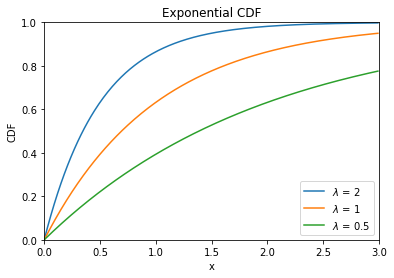

In [2]:
x = np.arange(0.0, 3.0, 0.01)
y1 = [1 - math.exp(-2 * x0) for x0 in x]
y2 = [1 - math.exp(-1 * x0) for x0 in x]
y3 = [1 - math.exp(-0.5 * x0) for x0 in x]

plt.plot(x, y1, label = '$\lambda$ = 2')
plt.plot(x, y2, label = '$\lambda$ = 1')
plt.plot(x, y3, label = '$\lambda$ = 0.5')
plt.xlim(0, 3.0)
plt.ylim(0, 1.0)
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Exponential CDF')
plt.legend();

Exponential distributions tend to come up when looking at a series of events and measuring the times between events, these are **interarrival times**. If the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.

**Example**

On December 18, 1997, 44 babies were born in a hospital in Brisbane, Australia.

In [3]:
df = analytic.ReadBabyBoom()
diffs = df.minutes.diff() #diffs is the difference between consecutive birth times

In [4]:
df.head()

,time,sex,weight_g,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


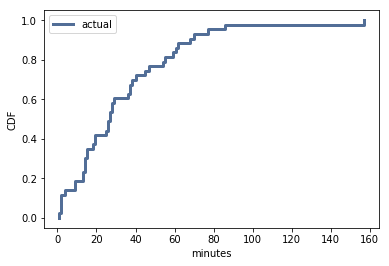

In [5]:
birth_diff_cdf = thinkstats2.Cdf(diffs, label='actual')
thinkplot.Cdf(birth_diff_cdf)
thinkplot.Show(xlabel='minutes', ylabel='CDF')

It seems to have the general shape of an exponential distribution, but how can we tell?

One way is to plot the **complementary CDF**, which is $1 - CDF(x)$, on a
log-y scale. 

For data from an exponential distribution, the result is a straight line.

If you plot the complementary CDF (CCDF) of a dataset that you think is exponential, you expect to see a function like:

$$y \approx e^{-\lambda x}$$

We take the log of both sides;

$$log(y) \approx -\lambda x$$

So, on a log-y scalle the CCDF is a straight line with slope $-\lambda$.

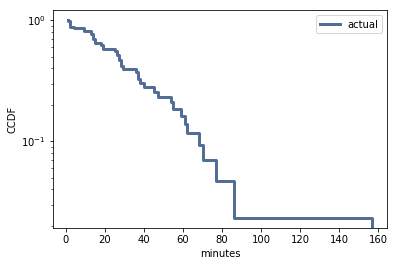

In [6]:
thinkplot.Cdf(birth_diff_cdf, complement=True)
thinkplot.Show(xlabel='minutes', ylabel='CCDF',yscale='log')

It is not exactly straight, which indicates that the exponential distribution is not a perfect model for this data. 

Most likely the underlying assumption, that a birth is equally likely at any time of day,is not exactly true. Nevertheless, it might be reasonable to model
this dataset with an exponential distribution.

With that simplifcation, we can summarize the distribution with a single parameter.

$\lambda$ can be interpreted as a rate, the number of events that occur, on average, in a unit of time. So, here 44 babies are born in 24 hours, so the rate is $\lambda - 0.0306 \text{births per minute}$. 

The **mean** of an exponential distriubtion is $\frac{1}{\lambda}$, so the mean time between births is $32.7 \text{minutes}$.

**Normal Distribution**

The normal distribution, also called **Gaussian**, is commonly used because it describes many phenomena, at least approximately.

The normal distribution is characterized by two parameters: the **mean**, $\mu$, and the **standard deviation**, $\sigma$.

The normal distribution with $\mu = 0$ and $\sigma = 1$ is called the **standard normal distribution**. 

The CDF for a normal distribution is definted by an intergral that does not have a closed form solution, but there are algorithms that evaluate it efficiently.

One of these is provided by **SciPy**, *scipy.stats.norm* is an object that represents a normal distriubtion and prvoides a method, cdf, that evaluated the standard normal CDF.

In [7]:
import scipy.stats
scipy.stats.norm.cdf(0) 
#correct, median is 0 and half values fall below a median

0.5

norm.cdf takes optional parameters: loc, which specifies the mean, and scale, which species the standard deviation.

In [8]:
x = np.arange(-1.0, 4.0, 0.01)
y1 = [scipy.stats.norm.cdf(x0, loc = 1, scale = 0.5) for x0 in x]
y2 = [scipy.stats.norm.cdf(x0, loc = 2, scale = 0.4) for x0 in x]
y3 = [scipy.stats.norm.cdf(x0, loc = 3, scale = 0.3) for x0 in x]

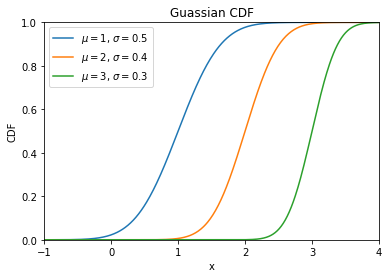

In [9]:
plt.plot(x, y1, label = '$\mu=1$, $\sigma=0.5$')
plt.plot(x, y2, label = '$\mu=2$, $\sigma=0.4$')
plt.plot(x, y3, label = '$\mu=3$, $\sigma=0.3$')
plt.xlim(-1.0, 4.0)
plt.ylim(0, 1.0)
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Guassian CDF')
plt.legend();

In the previous chapter we looked at the distribution of birth weights in the
NSFG. 

The normal distribution is a good model for this dataset, so if we summarize
the distribution with the parameters $\mu = 7.28$ and $\sigma = 1.24$, the resulting error (difference between the model and the data) is small.

Below the 10th percentile there is a discrepancy between the data and the model; there are more light babies than we would expect in a normal distribution.

If we are specifically interested in preterm babies, it would be important to get this part of the distribution right, so it might not be appropriate to
use the normal model.

In [10]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

weights = live.totalwgt_lb
cdf = thinkstats2.Cdf(weights, label='data')

In [11]:
x = np.linspace(0, 18, 100)

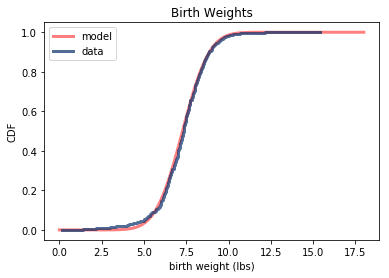

In [12]:
plt.figure()
plt.plot(x, scipy.stats.norm.cdf(x, loc = 7.28, scale = 1.24), 'r-', lw=3, alpha=0.5, label='model')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='birth weight (lbs)', ylabel='CDF', loc='upper left')
plt.title('Birth Weights')
plt.legend();

For the exponential distribution, and a few others, there are simple transformations we can use to test whether an analytic distribution is a good model for a dataset.

For the normal distribution there is no such transformation, but there is an alternative called a **normal probability plot**.

To generate;

1. Sort the values in the sample.
2. From a standard normal distribution ($\mu = 0$ and $\sigma = 1$), generate a random sample with the same size as the sample, and sort it.
3. Plot the sorted values from the sample versus the random values.

If the distribution of the sample is approximately normal, the result is a straight line with intercept mu and slope sigma.

thinkstats2 provides NormalProbability, which takes a sample and returns two NumPy arrays: xs, ys = thinkstats2.NormalProbability(sample) ys contains the sorted values from sample; xs contains the random values from the standard normal distribution.

In [13]:
def MakeNormalPlot(weights): #normalplot for our weights data
    mean = weights.mean()
    std = weights.std()
    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')
    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label='birth weights')

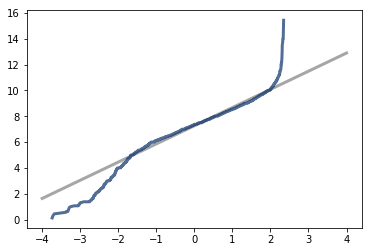

In [14]:
MakeNormalPlot(weights)

This plot suggests that the normal model describes the distribution well within a few standard deviations from the mean, but not in the tails.

Whether it is good enough for practical purposes depends on the purposes.

**Lognormal Distribution**

If the logarithms of a set of values have a normal distribution, the values have a **lognormal distribution**. The CDF of the lognormal distribution is the same as the CDF of the normal distribution, with $log(x)$ substituted for $x$.

$$CDF_{\text{lognormal}}(x) = CDF_{\text{normal}}(log(x))$$

The parameters of the lognormal distribution are usually denoted $\mu$ and
$\sigma$. But remember that **these parameters are not the mean and standard
deviation**; the mean of a lognormal distribution is $e^{(\mu \frac{\sigma^{2}}{2})}$ and the standard deviation is ugly.

If a sample is approximately lognormal and you plot its CDF on a log-x scale,
it will have the characteristic shape of a normal distribution. 

To test how well the sample fits a lognormal model, you can make a normal probability plot using the log of the values in the sample.

**Example**

The distribution of adult weights, which is approximately lognormal.

The National Center for Chronic Disease Prevention and Health Promotion conducts an annual survey as part of the Behavioral Risk Factor Surveillance System (BRFSS).3 In 2008, they interviewed 414,509 respondents and asked about their demographics, health, and health risks. Among the data they collected are the weights in kilograms of 398,484 respondents.

In [15]:
import ts_code.brfss as brfss

In [16]:
brfss_df = brfss.ReadBrfss()

In [17]:
weights = brfss_df.wtkg2.dropna()

In [18]:
def MakeNormalModel(weights):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(weights, label='weights')

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print('n, mean, std', len(weights), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

n, mean, std 398484 78.595995657 17.7545551918


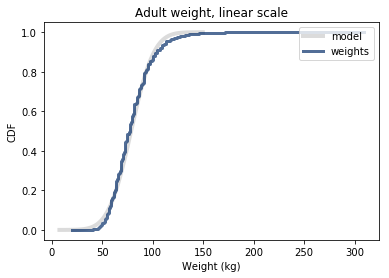

In [19]:
MakeNormalModel(weights)
thinkplot.Config(title='Adult weight, linear scale', xlabel='Weight (kg)',
                 ylabel='CDF', loc='upper right')

n, mean, std 398484 1.88466071373 0.0962358025915


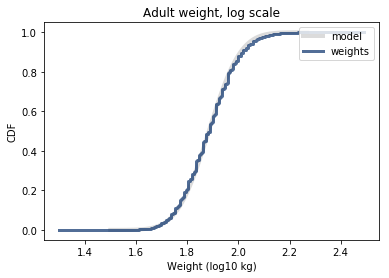

In [20]:
log_weights = np.log10(weights)
MakeNormalModel(log_weights)
thinkplot.Config(title='Adult weight, log scale', xlabel='Weight (log10 kg)',
                 ylabel='CDF', loc='upper right')

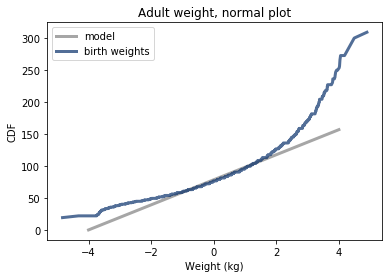

In [21]:
MakeNormalPlot(weights)
thinkplot.Config(title='Adult weight, normal plot', xlabel='Weight (kg)',
                 ylabel='CDF', loc='upper left')

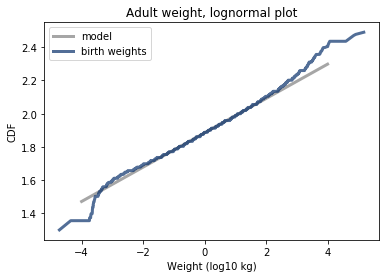

In [22]:
MakeNormalPlot(log_weights)
thinkplot.Config(title='Adult weight, lognormal plot', xlabel='Weight (log10 kg)',
                 ylabel='CDF', loc='upper left')

Above we can see the lognormal model is a better fit, but this representation of the data does not make the difference particularly dramatic.

The third and fourth figures show normal probability plots for adult weights, w, and for their logarithms, log10 w. Now it is apparent that the data deviate substantially from the normal model. On the other hand, the lognormal model is a good match for the data.

**The Pareto Distribution**

Named after economist Vilfredo Pareto, who uses it to describe the distribution of wealth. Since then it has been used to describe phenomena in the natural and social sciences including sizes of cities and towns, sand particles and meteorites, forest fires and eatherquakes.

The Pareto distribution has colloquially become known and referred to as the Pareto principle, or "80-20 rule". This rule states that, for example, 80% of the wealth of a society is held by 20% of its population. However, the Pareto distribution only produces this result for a particular power value, $\alpha$. While $\alpha$ is variable, empirical observation has found the 80-20 distribution to fit a wide range of cases, including natural phenomena and human activities.

The CDf of the Pareto distribution is;

$$CDF(x) = 1 - (\frac{x}{x_{m}})^{-\alpha}$$

where $x_{m}$ is the minimum possible value and $x_{m}$ and $\alpha$ determine the location and shape of the distribution. 

There is a simple visual test that indicates whether an empirical distribution
fits a Pareto distribution: on a log-log scale, the CCDF looks like a straight
line.

If you plot the CCDF of a sample from a Pareto distriubtion on a linear scale, you expect to see;

$$y \approx (\frac{x}{x_{m}})^{\alpha}$$

take the log of both sides;

$$log(y) \approx -\alpha(log(x)-log(x_{m}))$$

So if you plot $log(y)$ versus $log(x)$, it should look like a straight line with slope $-\alpha$ and intercept $\alpha log(x_{m})$.

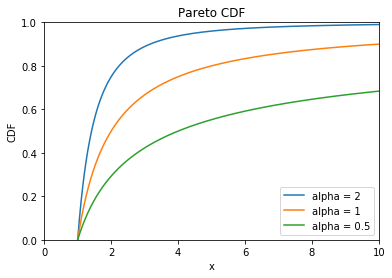

In [23]:
x = np.arange(1, 10.0, 0.01)

plt.plot(x, scipy.stats.pareto.cdf(x, 2), label='alpha = 2')
    
plt.plot(x, scipy.stats.pareto.cdf(x, 1), label='alpha = 1')
    
plt.plot(x, scipy.stats.pareto.cdf(x, 0.5), label='alpha = 0.5')

plt.xlim(0, 10)
plt.ylim(0, 1)
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Pareto CDF')

plt.legend();

**Example**

As an example, let's look at the sizes of cities and towns. The U.S. Census
Bureau publishes the population of every incorporated city and town in the
United States.

In [24]:
df = pd.read_csv('ts_code/PEP_2012_PEPANNRES_with_ann.csv', header=None, 
                 skiprows=2, encoding='iso-8859-1')

populations = df[7]
populations.replace(0, np.nan, inplace=True)
pops = populations.dropna()

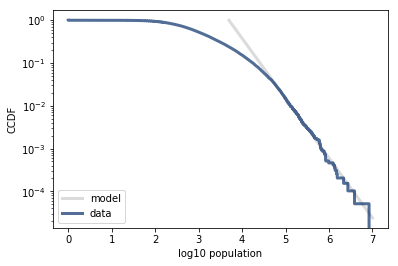

In [25]:
log_pops = np.log10(pops)
cdf = thinkstats2.Cdf(pops, label='data')
cdf_log = thinkstats2.Cdf(log_pops, label='data')

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=5000, alpha=1.4, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 population',
                 ylabel='CCDF',
                 yscale='log', loc='lower left')

The largest 1% of cities and towns, below $10^{-2}$, fall along a straight line. So we could conclude, as some researchers have, that the tail of this  distribution fits a Pareto model.

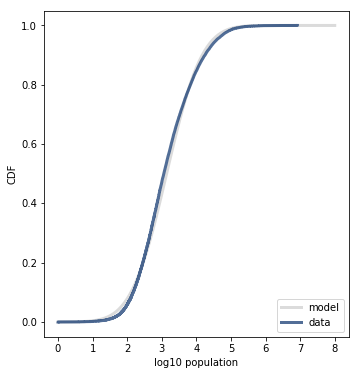

In [26]:
thinkplot.PrePlot(cols=2)

mu, sigma = log_pops.mean(), log_pops.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=8)
thinkplot.Plot(xs, ps, label='model', color='0.8')

thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='log10 population',
                 ylabel='CDF', loc='lower right')

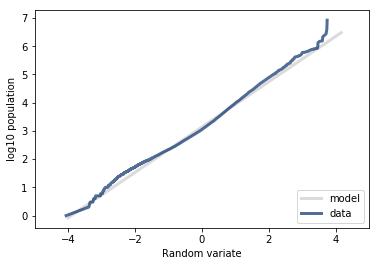

In [27]:
thinkstats2.NormalProbabilityPlot(log_pops, label='data')
thinkplot.Config(xlabel='Random variate',
                 ylabel='log10 population',
                 xlim=[-5, 5])

On the other hand, a lognormal distribution also models the data well. The CDF of populations and a lognormal model, and a normal probability plot. Both plots show good agreement between the data and the model.

Neither model is perfect. The Pareto model only applies to the largest 1% of cities, but it is a better fit for that part of the distribution. The lognormal
model is a better fit for the other 99%. Which model is appropriate depends
on which part of the distribution is relevant.

Analytic CDFs can be used to generate random numbers with a given distribution function, $p = CDF(x)$. If there is an efficient way to compute the inverse CDF, we can generate random values with the appropriate distribution by choosing $p$ from a **uniform distribution* between 0 and 1, then choosing $x = CDF^{-1}(p)$.

Recall that the CDF of the exponential distribution is;

$$p = 1- e^{-\lambda x}$$

solving for $x$;

$$x=-\frac{log(1-p)}{\lambda}$$

So, we can choose a random number between 0 and 1 as our $p$, plug it into the second equation and return a random value from the exponential distribution!

*Note:* this works for many distributions. 

Analytic distributions are abstractions, which means they leave out details that are considered irrelevant. 

For example, an observed distribution might have measurement errors or quirks that are specific to the sample; analytic models smooth out these idiosyncrasies.

Analytic models are also a form of data compression. When a model fits a dataset well, a small set of parameters can summarize a large amount of data.

It is important to remember that all models are imperfect. Data from the real world never fit an analytic distribution perfectly.

Models are useful if they capture the relevant aspects of the real world and leave out unneeded details. But what is "relevant" or "unneeded" depends on what you are planning to use the model for.

### Exercises

**Exercise 5.1** In the BRFSS, the distribution of heights is roughly normal with parameters $\mu = 178 \text{cm}$ and $\sigma = 7.7 \text{cm}$ for men, and
$\mu = 163 \text{cm}$ and $\sigma = 7.3 \text{cm}$ for women.

In order to join Blue Man Group, you have to be male between 5'10" and
6'1". What percentage of the U.S. male population is in this range?

In [28]:
percentiles = scipy.stats.norm.cdf([177.8, 185.42], loc = 178, scale = 7.7)
percent_between = (percentiles[1] - percentiles[0]) * 100
percent_between

34.274683763147365

**Exercise 5.2** To get a feel for the Pareto distribution, let's see how different the world would be if the distribution of human height were Pareto. 

With the parameters $x_{m} = 1 \text{meter}$ and $\alpha = 1.7$, we get a distribution with a reasonable minimum, 1 meter, and median, 1.5 meters.

Plot this distribution. What is the mean human height in Pareto world?

> 2.4285 meters.

What fraction of the population is shorter than the mean?

> 77.87%

If there are 7 billion people in Pareto world, how many do we expect to be taller than 1km? 

> 55,602 people

How tall do we expect the tallest person to be?

> 618,349 meters

In [29]:
b = 1.7
pareto_height = scipy.stats.pareto(1.7)

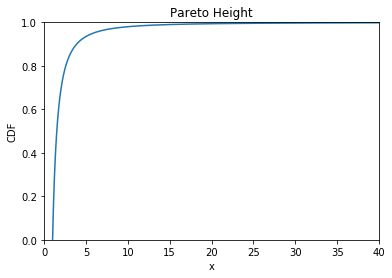

In [30]:
x = np.arange(1.0, 100000, 0.01)

plt.plot(x, pareto_height.cdf(x))
    
plt.xlim(0, 40)
plt.ylim(0, 1)
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Pareto Height');

In [31]:
mean, _ = pareto_height.stats()
mean = float(mean)
mean

2.428571428571429

In [32]:
pareto_height.cdf(mean)

0.77873969756528805

In [33]:
(1- pareto_height.cdf(1000)) * 7e9

55602.976430479954

In [34]:
#`ppf`,  evaluates the "percent point function", which  is the inverse CDF.  
#So we can compute the height in meters that corresponds to
# the probability (1 - 1/7e9).
pareto_height.ppf(1 - 1/7e9)

618349.61067595053

**Exercise 5.3** The Weibull distribution is a generalization of the exponential distribution that comes up in failure analysis.

$$CDF(x) = 1 - e^{-(\frac{x}{\lambda})^{k}}$$

Can you find a transformation that makes a Weibull distribution look like a straight line?  

Swap out $CDF(X)$ for $z$ and $x$ for $t$

$$z = 1 - e^{-(\frac{t}{\lambda})^{k}}$$
$$1-z = e^{-(\frac{t}{\lambda})^{k}}$$
natural log both sides;
$$log(1-z) = -(\frac{t}{\lambda})^{k}$$
take the natural log again;
$$log(-log(1-z)) = k(log(\frac{t}{\lambda})$$
negtive log is same a the log of the recipricol and we can split log of a quotient into subtraction;
$$log(log(\frac{1}{1-z})) = klog(t) - klog(\lambda)$$
set $y = log(log(\frac{1}{1-z}))$ and $x= log(t)$ then;

$$y = kx - klog(\lambda)$$

So, now we have a linear equations with a slope of $k$ and an intercept of $klog(\lambda)$.

The x-axis is logarithmic, $x = log(t)$. The y-axis is slightly more complicated, since it must represent: $log(-log(1-z))$.

In [35]:
def weibull_trans(x, k=1, lam=2): 
    y = (k * x) - (k*np.log(lam))
    return y

In [36]:
x = np.arange(0.01, 10.0, 0.01)
y = weibull_trans(x, k=3, lam=2)

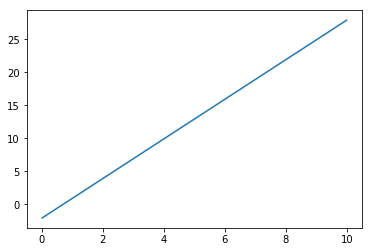

In [37]:
plt.plot(x, y);

In [38]:
import random
x2 = np.array([random.weibullvariate(3, 2) for i in range(len(x))])

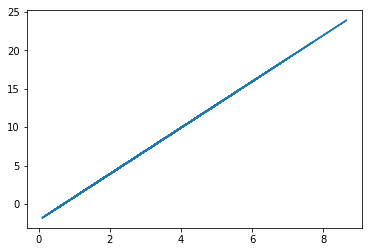

In [39]:
y2 = weibull_trans(x2, k=3, lam=2)
plt.plot(x2, y2)

**Exercise 5.4** For small values of $n$, we don't expect an empirical distribution to fit an analytic distribution exactly. One way to evaluate the quality of fit is to generate a sample from an analytic distribution and see how well it matches the data.

For example, in Section 5.1 we plotted the distribution of time between births and saw that it is approximately exponential. But the distribution is basedon only 44 data points. To see whether the data might have come from an exponential distribution, generate 44 values from an exponential distribution with the same mean as the data, about 33 minutes between births.

Plot the distribution of the random values and compare it to the actual distribution. You can use random.expovariate to generate the values.

In [40]:
birth_diff_cdf = thinkstats2.Cdf(diffs, label='actual')
mean = birth_diff_cdf.Mean()

In [41]:
random_ex = [random.expovariate(1/mean) for i in range(len(diffs))]

In [42]:
ran_birth_diff_cdf = thinkstats2.Cdf(random_ex, label='random')

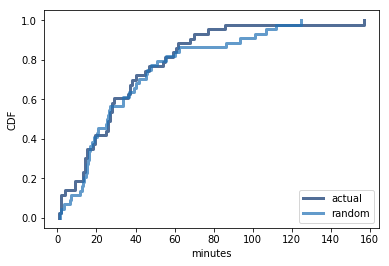

In [43]:
thinkplot.Cdf(birth_diff_cdf)
thinkplot.Cdf(ran_birth_diff_cdf)
thinkplot.Show(xlabel='minutes', ylabel='CDF')

**Exercise 5.5** In the repository for this book, you'll find a set of data files called mystery0.dat, mystery1.dat, and so on.  Each contains a sequence of random numbers generated from an analytic distribution. You will also find test_models.py, a script that reads data from a file andplots the CDF under a variety of transforms. You can run it like this:

`$ python test_models.py mystery0.dat`

Based on these plots, you should be able to infer what kind of distributiongenerated each file. 

In [44]:
import ts_code.test_models as test_models

/home/scott/ds/thinkStats/ts_code/thinkplot.py:118: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


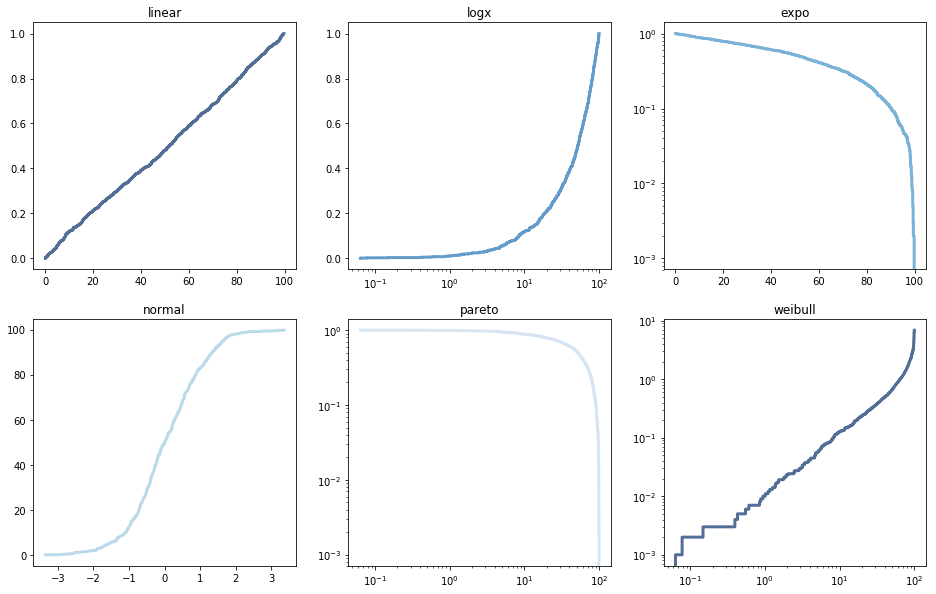

In [45]:
test_models.main(filename = 'ts_code/mystery0.dat')

> Uniform because it can generate all of the dstirubtions correctly.

>**Correct**

/home/scott/ds/thinkStats/ts_code/thinkplot.py:118: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


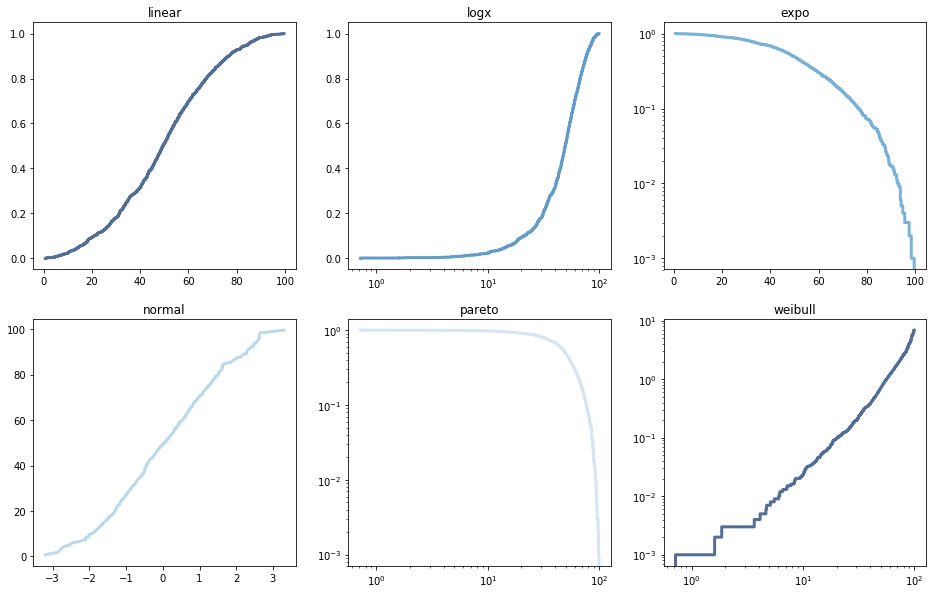

In [46]:
test_models.main(filename = 'ts_code/mystery1.dat')

>Not sure, looks a bit like the normal.

> This was a triangular sample, not covered, but looks like a mountain in a graph. Explains why the normal transformation looks close

/home/scott/ds/thinkStats/ts_code/thinkplot.py:118: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


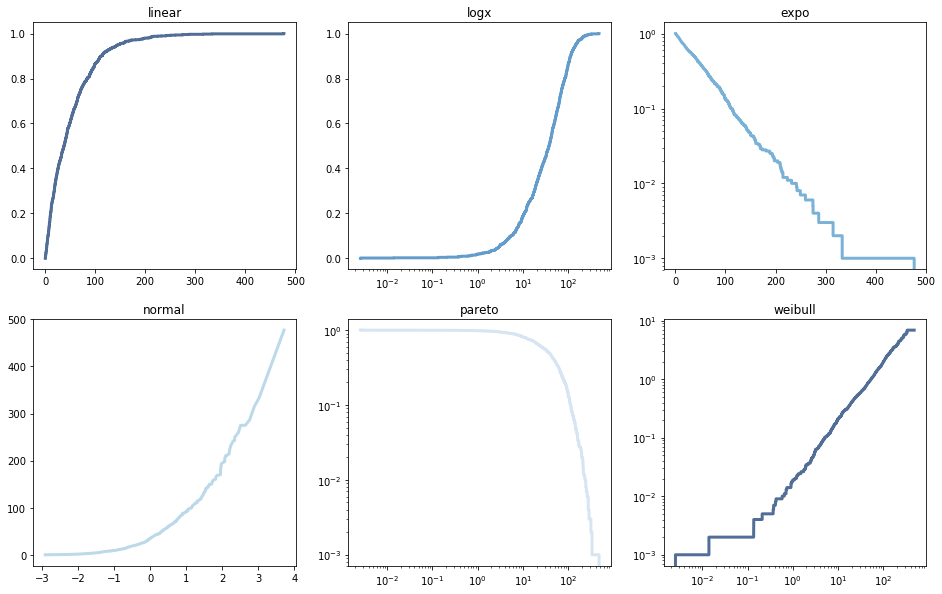

In [47]:
test_models.main(filename = 'ts_code/mystery2.dat')

>Exponential transformation become close to linear, this is an exponential distribution.

>**Correct**

/home/scott/ds/thinkStats/ts_code/thinkplot.py:118: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


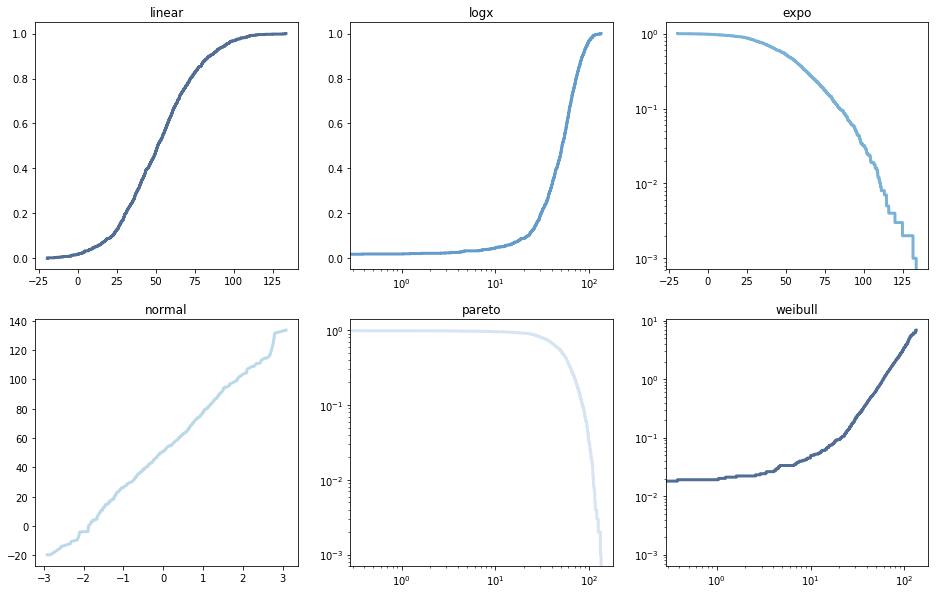

In [48]:
test_models.main(filename = 'ts_code/mystery3.dat')

> Normal distribution becomes close to linear

>**Correct**

/home/scott/ds/thinkStats/ts_code/thinkplot.py:118: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


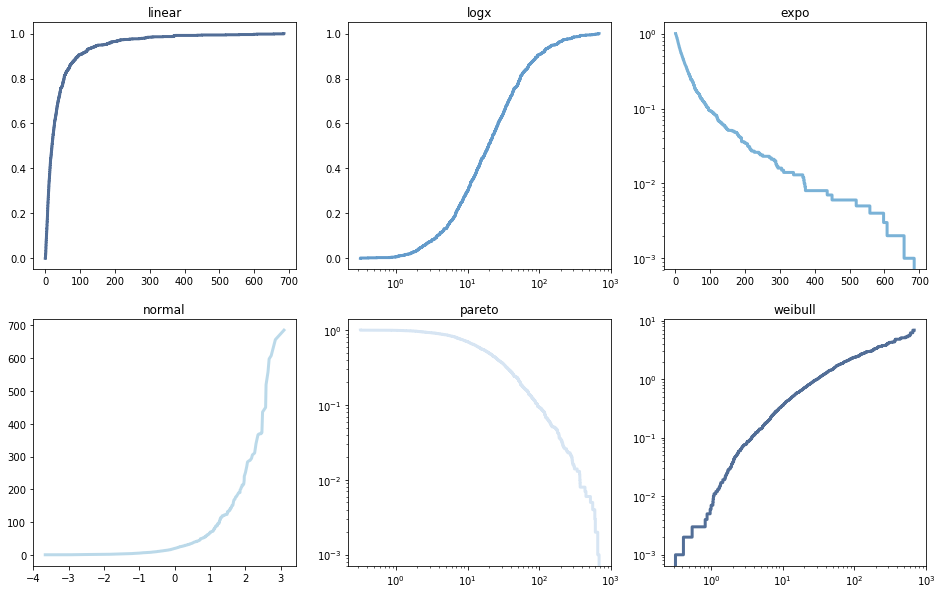

In [49]:
test_models.main(filename = 'ts_code/mystery4.dat')

>This is lognorm because of the way the the normal transformation is close exponential.


> **Correct**

/home/scott/ds/thinkStats/ts_code/thinkplot.py:118: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


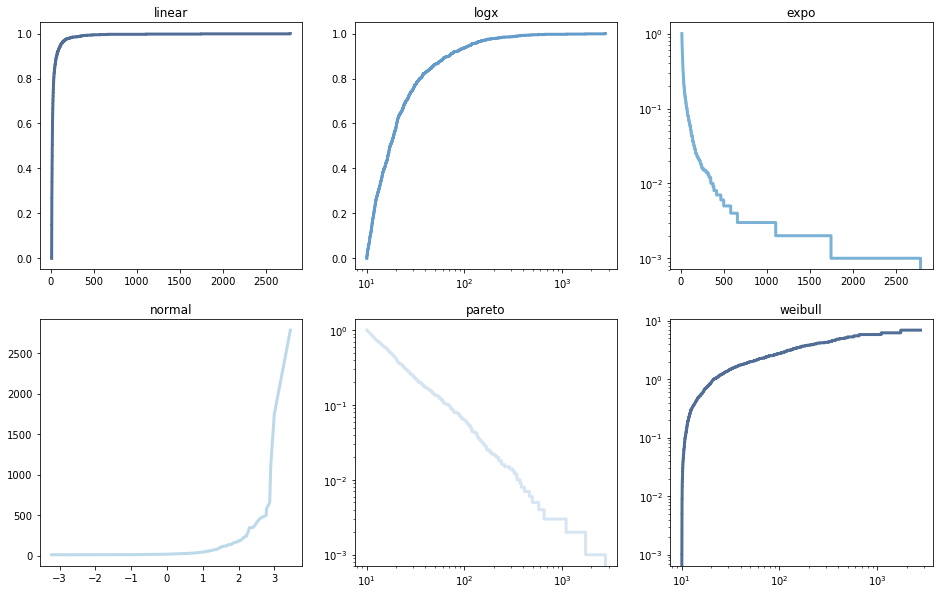

In [50]:
test_models.main(filename = 'ts_code/mystery5.dat')

> Pareto, might have been the easiest to identify.

>**Correct**

/home/scott/ds/thinkStats/ts_code/thinkplot.py:118: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


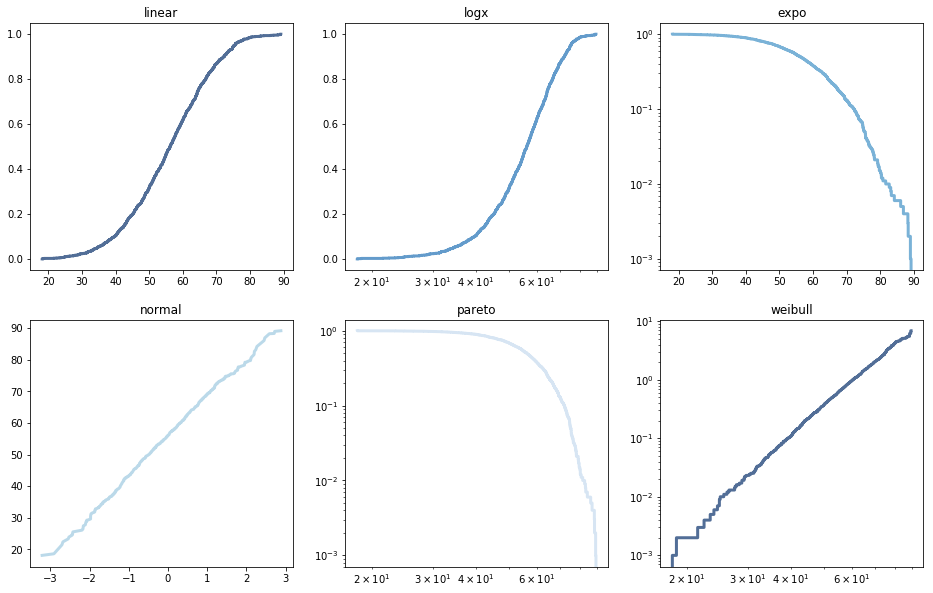

In [51]:
test_models.main(filename = 'ts_code/mystery6.dat')

> Cloest weibull has been to linear, so I belive that's it.

>**Correct**

/home/scott/ds/thinkStats/ts_code/thinkplot.py:118: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


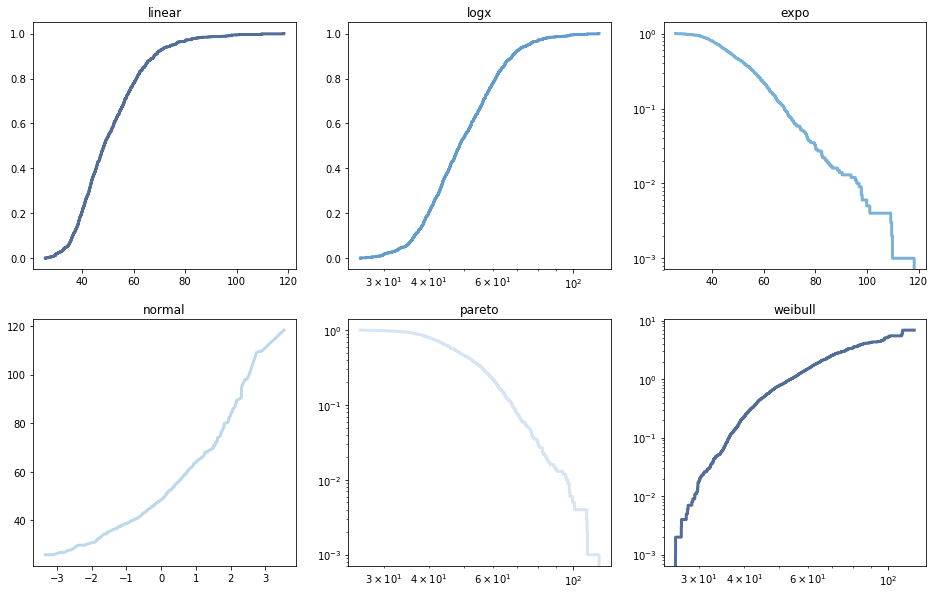

In [52]:
test_models.main(filename = 'ts_code/mystery7.dat')

>Not sure.

>This a gumbel sample,  used to model the distribution of the maximum (or the minimum) number of a number of samples of various distributions, is very close to normal.

**Exercise 5.6** The distributions of wealth and income are sometimes modeled using lognormal and Pareto distributions. To see which is better, let's look at some data.

The Current Population Survey (CPS) is a joint effort of the Bureau of LaborStatistics  and  the  Census  Bureau  to  study  income  and  related  variables.

Extract the distribution of incomes from this dataset.  

Are any of the analytic distributions in this chapter a good model of the data?

In [53]:
import ts_code.hinc as hinc

In [54]:
cps = hinc.main()

In [55]:
cps.head()

,income,freq,cumsum,ps
0,4999.0,4204,4204,0.034330
1,9999.0,4729,8933,0.072947
2,14999.0,6982,15915,0.129963
3,19999.0,7157,23072,0.188407
4,24999.0,7131,30203,0.246640


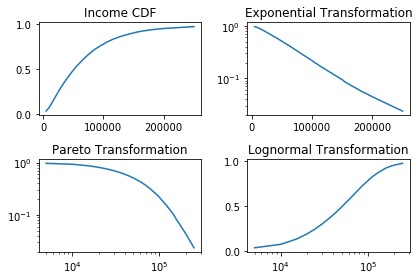

In [56]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

#distribution of income and probabilities, the CDF
ax1.plot(cps['income'], cps['ps'])
ax1.set_title('Income CDF')

#check if exponential distribution fits by ploting 1-CDF(x) vs data on log(y) scale
ax2.plot(cps['income'], 1-cps['ps'])
ax2.set_yscale('log');
ax2.set_title('Exponential Transformation')

#check pareto distribution by ploting log(1-CDF(x)) against log(x)
ax3.plot(cps['income'], 1-cps['ps'])
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_title('Pareto Transformation')

#check log normal by ploting log(x), and CDF(x).
ax4.plot(cps.income, cps.ps)
ax4.set_xscale('log')
ax4.set_title('Lognormal Transformation')

plt.tight_layout();

> It looks like the exponential distribution works pretty well, but this was not covered in the solution.

### Glossary

**empirical distribution:** The distribution of values in a sample.

**analytic distribution:** A distribution whose CDF is an analytic function.

**model:** A useful simplification. Analytic distributions are often good models of more complex empirical distributions.

**interarrival time:** The elapsed time between two events.

**complementary  CDF:** A function that maps from a value, x, to the fraction of values that exceed x, which is $1-CDF(x)$.

**standard  normal  distribution:** The normal distribution with mean equal to 0 and a standard deviation of 1.

**normal probability plot:** A plot of the values in a sample versus randomvalues from a standard normal distribution.